In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams["figure.autolayout"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import torch
from torch import nn, optim
from utils import Legendre_Polynomials
import torch.nn.functional as F

## Defining the parameters of the equation

In [37]:
# f = lambda x: x ** -.25  # Source function
f = lambda x: 1  # Source function
k = 3. * (np.pi / 2)  # frequency
a, b = -1., +1.  # Domain
ga, gb = 0., 1.  # Values at the boundaries

## Training the neural network

In [38]:
from solvers import VPINN_HelmholtzImpedance

width = 10
depth = 1
activation = F.relu
testfuncs = 10
penalty = None

cuda = False
epochs = 5000
lr = 1e-04
momentum = .2
seed = None
dropout_probs = None

model = VPINN_HelmholtzImpedance(f=f, k=k, a=a, b=b, ga=ga, gb=gb,
                                layers=[1] + [width for _ in range(depth)] + [2],
                                activation=activation,
                                dropout_probs=dropout_probs,
                                penalty=penalty,
                                N_quad=100,
                                seed=seed,
                                cuda=cuda,
                                )

testfunctions = Legendre_Polynomials(testfuncs - 1)()
if cuda:
  model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=lr)
model.train_(epochs, testfunctions, optimizer)

/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))


Epoch 000000 / 5000: loss = 9.88e+12


KeyboardInterrupt: 

## Evaluating the results

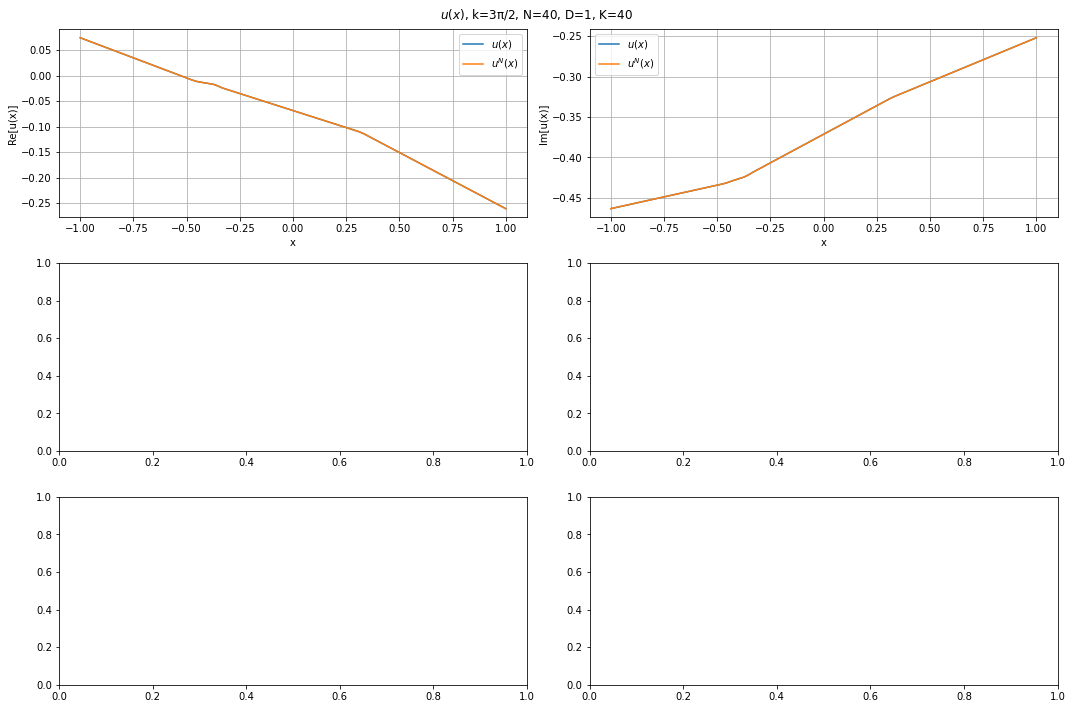

In [ ]:
xpts = torch.linspace(a, b, 100).float().view(-1, 1)

model.eval()
upts_re, upts_im = model.deriv(0, xpts)  # FIXME: Should be exact solution
rpts_re, rpts_im = model.deriv(0, xpts)
with torch.no_grad():
    xpts = xpts.numpy()
    upts_re = upts_re.numpy()
    upts_im = upts_im.numpy()
    rpts_re = rpts_re.numpy()
    rpts_im = rpts_im.numpy()

plt.rcParams['figure.figsize'] = [15, 10]
fig, axs = plt.subplots(3, 2)
fig.tight_layout(pad=4.0)
fig.suptitle(f'$u(x)$, k={round(model.k.item() / (np.pi / 2))}π/2, N={width}, D={depth}, K={testfuncs}')

axs[0, 0].plot(xpts, upts_re, label='$u(x)$')
axs[0, 0].plot(xpts, rpts_re, label='$u^N(x)$')
axs[0, 0].set(xlabel='x', ylabel='Re[u(x)]')
axs[0, 0].legend()
axs[0, 0].grid()
axs[0, 1].plot(xpts, upts_im, label='$u(x)$')
axs[0, 1].plot(xpts, rpts_im, label='$u^N(x)$')
axs[0, 1].set(xlabel='x', ylabel='Im[u(x)]')
axs[0, 1].legend()
axs[0, 1].grid()

# axs[1, 0].errorbar(xpts, upts.real, yerr=upts.real - rpts.real, ecolor='black', label='$u(x)$')
# axs[1, 0].set(xlabel='x', ylabel='Re[u(x)]')
# axs[1, 0].legend()
# axs[1, 0].grid()
# axs[1, 1].errorbar(xpts, upts.imag, yerr=upts.imag - rpts.imag, ecolor='black', label='$u(x)$')
# axs[1, 1].set(xlabel='x', ylabel='Im[u(x)]')
# axs[1, 1].legend()
# axs[1, 1].grid()

# axs[2, 0].plot(xpts, upts.real - rpts.real)
# axs[2, 0].set(xlabel='x', ylabel='$Re[u(x)-u^N(x)]$')
# axs[2, 0].grid()
# axs[2, 1].plot(xpts, upts.imag - rpts.imag)
# axs[2, 1].set(xlabel='x', ylabel='$Im[u(x)-u^N(x)]$')
# axs[2, 1].grid()

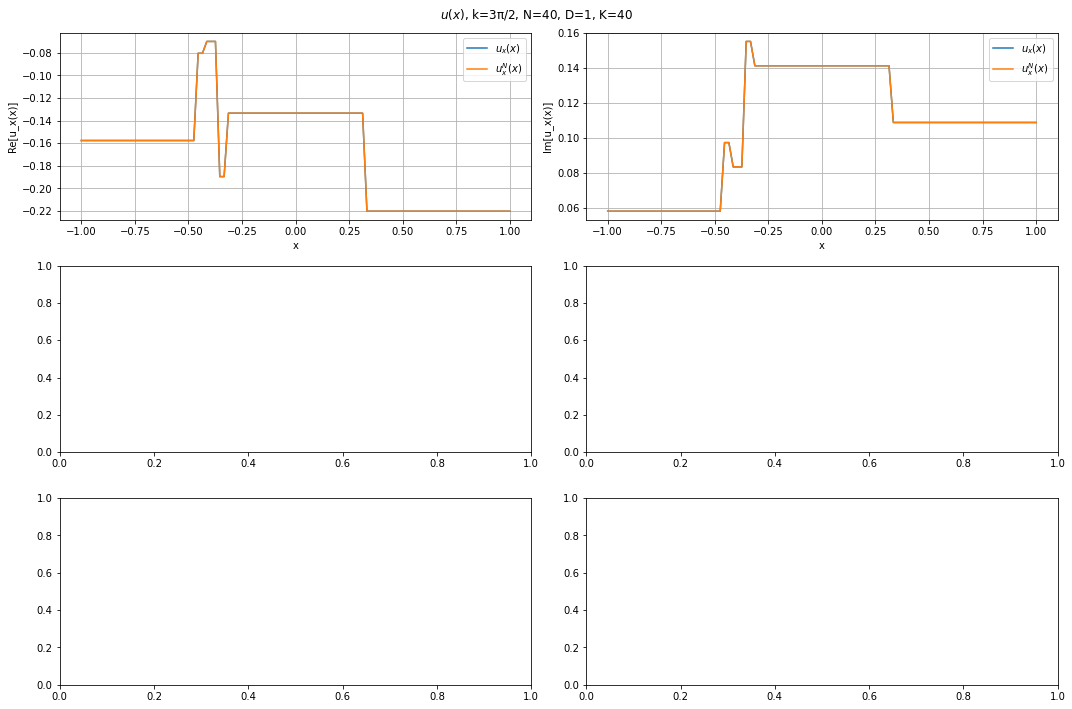

In [ ]:
xpts = torch.linspace(a, b, 100).float().view(-1, 1).requires_grad_()

model.eval()
upts_re, upts_im = model.deriv(1, xpts)  # FIXME: Should be exact solution
rpts_re, rpts_im = model.deriv(1, xpts)
with torch.no_grad():
    xpts = xpts.numpy()
    upts_re = upts_re.numpy()
    upts_im = upts_im.numpy()
    rpts_re = rpts_re.numpy()
    rpts_im = rpts_im.numpy()

plt.rcParams['figure.figsize'] = [15, 10]
fig, axs = plt.subplots(3, 2)
fig.tight_layout(pad=4.0)
fig.suptitle(f'$u(x)$, k={round(model.k.item() / (np.pi / 2))}π/2, N={width}, D={depth}, K={testfuncs}')

axs[0, 0].plot(xpts, upts_re, label='$u_x(x)$')
axs[0, 0].plot(xpts, rpts_re, label='$u^N_x(x)$')
axs[0, 0].set(xlabel='x', ylabel='Re[u_x(x)]')
axs[0, 0].legend()
axs[0, 0].grid()
axs[0, 1].plot(xpts, upts_im, label='$u_x(x)$')
axs[0, 1].plot(xpts, rpts_im, label='$u^N_x(x)$')
axs[0, 1].set(xlabel='x', ylabel='Im[u_x(x)]')
axs[0, 1].legend()
axs[0, 1].grid()

# axs[1, 0].errorbar(xpts, upts.real, yerr=upts.real - rpts.real, ecolor='black', label='$u_x(x)$')
# axs[1, 0].set(xlabel='x', ylabel='Re[u_x(x)]')
# axs[1, 0].legend()
# axs[1, 0].grid()
# axs[1, 1].errorbar(xpts, upts.imag, yerr=upts.imag - rpts.imag, ecolor='black', label='$u_x(x)$')
# axs[1, 1].set(xlabel='x', ylabel='Im[u_x(x)]')
# axs[1, 1].legend()
# axs[1, 1].grid()

# axs[2, 0].plot(xpts, upts.real - rpts.real)
# axs[2, 0].set(xlabel='x', ylabel='$Re[u_x(x)-u^N_x(x)]$')
# axs[2, 0].grid()
# axs[2, 1].plot(xpts, upts.imag - rpts.imag)
# axs[2, 1].set(xlabel='x', ylabel='$Im[u_x(x)-u^N_x(x)]$')
# axs[2, 1].grid()